# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [2]:
dataset = pd.read_csv('coroml.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset

,Patient ID,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),"SARS-Cov-2 exam result(Negative=0,Positive=1)"
0,1000,16,-0.701917,-0.460932,0.437284,-0.662483,-0.814774,0.668057,0.841616,-0.489767,0.387152,0.753163,-0.371974,0.386517,0.462600,0.967144,0
1,1001,0,-0.862136,-0.648900,1.630656,0.347255,-1.255533,2.928253,0.742040,-0.431328,-0.529226,1.328151,1.566437,1.127610,1.014127,1.674795,0
2,1002,3,-1.823456,-1.902020,0.248857,1.132609,-1.608140,0.506005,-0.950790,-0.013909,-0.223767,-0.501356,-0.371974,-0.094192,-0.272770,-0.094334,0
3,1003,7,1.243612,0.980156,0.198610,0.683835,0.842479,1.230973,-0.652057,-1.065805,1.914447,0.125903,2.493503,0.446606,-0.798034,0.171035,0
4,1004,7,1.266501,1.168124,-0.190806,0.908221,0.824849,0.497476,-0.054585,-0.325582,1.608988,0.439533,0.091559,0.526723,-0.430350,-0.978899,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,1598,18,1.197836,1.356092,-1.911774,1.132609,0.384090,0.966573,0.841616,-0.834833,-0.529226,1.589509,-0.582671,1.307876,1.197969,-0.094334,1
598,1599,19,0.190738,0.165628,-0.102873,0.908221,0.384090,-1.583611,-0.054585,-0.328365,-0.834685,-0.449085,0.892207,-0.474754,1.066653,0.347948,0
599,1600,19,-0.289922,-0.523588,0.663397,-0.774677,0.754327,-1.532437,-1.050367,1.569499,0.081693,-2.174047,-0.540532,-1.976971,1.670707,0.967144,0
600,1601,15,0.717175,1.105468,-0.492289,-0.213711,0.613284,0.002791,1.538664,-0.550988,-0.223767,0.700891,-0.709090,0.005955,0.909074,-1.155812,0


In [4]:
# Taking care of missing data
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X[:, :-1])
X[:, :-1] = imputer.transform(X[:, :-1])

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Naive Bayes 

In [7]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [8]:
# Predicting the Test set results
y_pred = (classifier.predict_proba(X_test)[:,1] >= 0.7)

In [9]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[95, 10],
       [ 6, 10]], dtype=int64)

In [10]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

accuracy(cm) 

0.8677685950413223

Confusion matrix, without normalization
[[89 16]
 [ 3 13]]
Normalized confusion matrix
[[0.84761905 0.15238095]
 [0.1875     0.8125    ]]


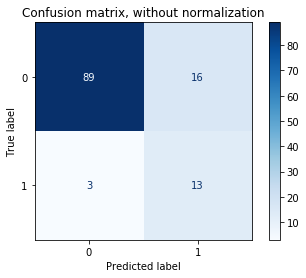

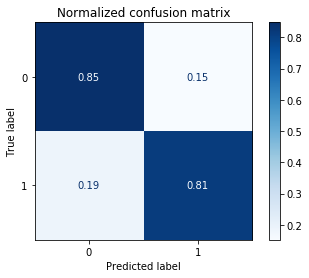

In [11]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Linear Regression 

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# Predicting the Test set results
#y_pred = (regressor.predict_proba(X_test)[:,1] >= 0.7)
y_pred = regressor.predict(X_test)

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,1,0.387003
1,0,-0.108375
2,0,0.482515
3,0,-0.048335
4,0,-0.172797
...,...,...
116,0,0.209869
117,0,0.325015
118,0,-0.106579
119,0,0.066409


# Logistic Regression

In [15]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
# Predicting the Test set results
y_pred = (classifier.predict_proba(X_test)[:,1] >= 0.7)

In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[103,   2],
       [  9,   7]], dtype=int64)

In [18]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

accuracy(cm) 

0.9090909090909091

Confusion matrix, without normalization
[[100   5]
 [  7   9]]
Normalized confusion matrix
[[0.95238095 0.04761905]
 [0.4375     0.5625    ]]


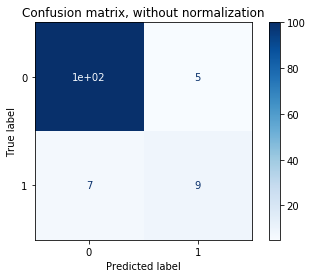

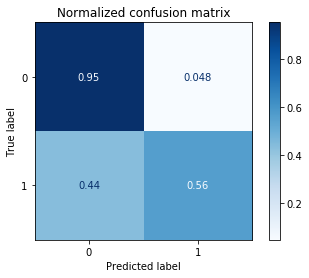

In [19]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Support Vector Machine(SVM) 

In [20]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0,probability= True)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [21]:
# Predicting the Test set results
y_pred = (classifier.predict_proba(X_test)[:,1] >= 0.7)

In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[105,   0],
       [ 11,   5]], dtype=int64)

In [23]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

accuracy(cm) 

0.9090909090909091

Confusion matrix, without normalization
[[101   4]
 [  8   8]]
Normalized confusion matrix
[[0.96190476 0.03809524]
 [0.5        0.5       ]]


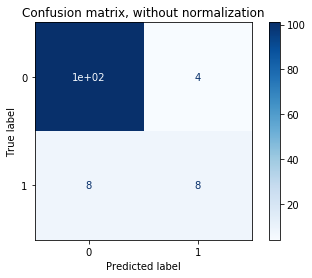

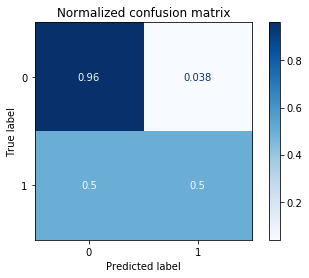

In [24]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Random Forest

In [25]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
# Predicting the Test set results
y_pred = (classifier.predict_proba(X_test)[:,1] >= 0.7)

In [27]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[104,   1],
       [ 11,   5]], dtype=int64)

In [28]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

accuracy(cm) 

0.9008264462809917

Confusion matrix, without normalization
[[104   1]
 [  9   7]]
Normalized confusion matrix
[[0.99047619 0.00952381]
 [0.5625     0.4375    ]]


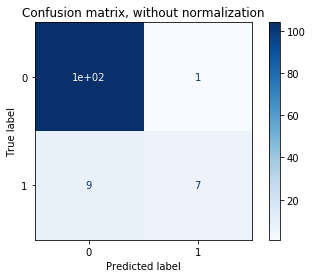

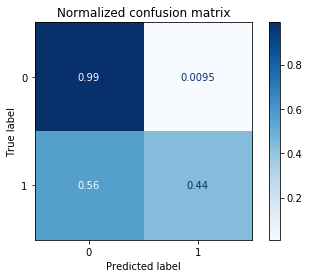

In [29]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Neural Network 

In [31]:
from sklearn.utils import shuffle
import tensorflow as tf
data = pd.read_csv('coroml.csv')
data = shuffle(data, random_state = 42)

X = data.iloc[:, 1:-1].values
Y = data.iloc[:,-1].values

#missing data 

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X[:, :-1])
X[:, :-1] = imputer.transform(X[:, :-1])


trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.3, random_state = 24)


#feature scaling
sc = StandardScaler()
trainX = sc.fit_transform(trainX)
testX = sc.transform(testX)


trainY = tf.one_hot(trainY, depth=2)
testY = tf.one_hot(testY, depth=2)

In [32]:
# ANN model
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32,activation='sigmoid',input_dim=15))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.Dense(16, activation='sigmoid'))

model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(8, activation='sigmoid'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001)  
#opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD")


model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=["accuracy"])

In [33]:
history = model.fit(trainX, trainY, validation_data=(trainX, trainY), epochs=190, batch_size=32)

Epoch 1/190
14/14 [==============================] - 1s 36ms/step - loss: 0.4370 - accuracy: 0.8575 - val_loss: 0.4113 - val_accuracy: 0.8575
Epoch 2/190
14/14 [==============================] - 0s 9ms/step - loss: 0.4125 - accuracy: 0.8575 - val_loss: 0.3997 - val_accuracy: 0.8575
Epoch 3/190
14/14 [==============================] - 0s 9ms/step - loss: 0.3939 - accuracy: 0.8575 - val_loss: 0.3858 - val_accuracy: 0.8575
Epoch 4/190
14/14 [==============================] - 0s 9ms/step - loss: 0.3793 - accuracy: 0.8575 - val_loss: 0.3563 - val_accuracy: 0.8575
Epoch 5/190
14/14 [==============================] - 0s 10ms/step - loss: 0.3440 - accuracy: 0.8575 - val_loss: 0.3190 - val_accuracy: 0.8575
Epoch 6/190
14/14 [==============================] - 0s 9ms/step - loss: 0.3108 - accuracy: 0.8575 - val_loss: 0.2916 - val_accuracy: 0.8575
Epoch 7/190
14/14 [==============================] - 0s 9ms/step - loss: 0.2965 - accuracy: 0.8599 - val_loss: 0.2811 - val_accuracy: 0.8575
Epoch 8/190

14/14 [==============================] - 0s 9ms/step - loss: 0.1900 - accuracy: 0.9192 - val_loss: 0.1641 - val_accuracy: 0.9406
Epoch 59/190
14/14 [==============================] - 0s 9ms/step - loss: 0.1862 - accuracy: 0.9311 - val_loss: 0.1637 - val_accuracy: 0.9454
Epoch 60/190
14/14 [==============================] - 0s 11ms/step - loss: 0.1945 - accuracy: 0.9335 - val_loss: 0.1634 - val_accuracy: 0.9382
Epoch 61/190
14/14 [==============================] - 0s 9ms/step - loss: 0.1747 - accuracy: 0.9264 - val_loss: 0.1565 - val_accuracy: 0.9430
Epoch 62/190
14/14 [==============================] - 0s 9ms/step - loss: 0.1867 - accuracy: 0.9311 - val_loss: 0.1613 - val_accuracy: 0.9382
Epoch 63/190
14/14 [==============================] - 0s 9ms/step - loss: 0.1735 - accuracy: 0.9311 - val_loss: 0.1540 - val_accuracy: 0.9454
Epoch 64/190
14/14 [==============================] - 0s 9ms/step - loss: 0.1859 - accuracy: 0.9169 - val_loss: 0.1525 - val_accuracy: 0.9382
Epoch 65/190
14/14

14/14 [==============================] - 0s 10ms/step - loss: 0.1349 - accuracy: 0.9359 - val_loss: 0.0790 - val_accuracy: 0.9572
Epoch 116/190
14/14 [==============================] - 0s 9ms/step - loss: 0.0980 - accuracy: 0.9549 - val_loss: 0.0774 - val_accuracy: 0.9549
Epoch 117/190
14/14 [==============================] - 0s 9ms/step - loss: 0.1123 - accuracy: 0.9477 - val_loss: 0.0750 - val_accuracy: 0.9572
Epoch 118/190
14/14 [==============================] - 0s 9ms/step - loss: 0.1231 - accuracy: 0.9454 - val_loss: 0.0731 - val_accuracy: 0.9667
Epoch 119/190
14/14 [==============================] - 0s 9ms/step - loss: 0.1046 - accuracy: 0.9549 - val_loss: 0.0717 - val_accuracy: 0.9620
Epoch 120/190
14/14 [==============================] - 0s 9ms/step - loss: 0.1088 - accuracy: 0.9477 - val_loss: 0.0722 - val_accuracy: 0.9667
Epoch 121/190
14/14 [==============================] - 0s 9ms/step - loss: 0.1109 - accuracy: 0.9525 - val_loss: 0.0724 - val_accuracy: 0.9691
Epoch 122/19

14/14 [==============================] - 0s 9ms/step - loss: 0.0973 - accuracy: 0.9549 - val_loss: 0.0384 - val_accuracy: 0.9857
Epoch 173/190
14/14 [==============================] - 0s 9ms/step - loss: 0.0893 - accuracy: 0.9620 - val_loss: 0.0372 - val_accuracy: 0.9905
Epoch 174/190
14/14 [==============================] - 0s 9ms/step - loss: 0.0582 - accuracy: 0.9762 - val_loss: 0.0393 - val_accuracy: 0.9857
Epoch 175/190
14/14 [==============================] - 0s 9ms/step - loss: 0.0540 - accuracy: 0.9857 - val_loss: 0.0365 - val_accuracy: 0.9881
Epoch 176/190
14/14 [==============================] - 0s 11ms/step - loss: 0.0581 - accuracy: 0.9810 - val_loss: 0.0326 - val_accuracy: 0.9881
Epoch 177/190
14/14 [==============================] - 0s 10ms/step - loss: 0.0436 - accuracy: 0.9834 - val_loss: 0.0327 - val_accuracy: 0.9929
Epoch 178/190
14/14 [==============================] - 0s 9ms/step - loss: 0.0609 - accuracy: 0.9691 - val_loss: 0.0331 - val_accuracy: 0.9881
Epoch 179/1

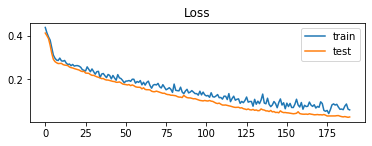

<Figure size 432x288 with 0 Axes>

In [34]:
#plot loss during training
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.ylim()
pyplot.legend()
pyplot.show()
pyplot.savefig('loss.png')

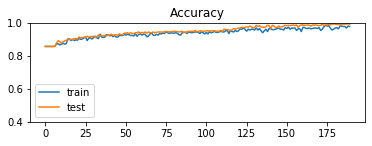

In [35]:
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.ylim([0.4,1])
pyplot.legend()
pyplot.savefig('accuracy.png')

In [36]:
# prediction
predy = model.predict(testX)

from sklearn.metrics import multilabel_confusion_matrix

rounded_labels_pred=np.argmax(predy, axis=1)

rounded_labels_real=np.argmax(testY, axis=1)

In [37]:
#accuracy
count = 0
for result in range(len(rounded_labels_real)):
    if rounded_labels_real[result] == rounded_labels_pred[result]:
        count += 1
accuracy  = count/len(rounded_labels_real)*100
print(accuracy) 

85.0828729281768


In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(rounded_labels_real,rounded_labels_pred)
print(cm)
cm_display = ConfusionMatrixDisplay(cm)
cm_display = cm_display.plot(cmap=plt.cm.Blues,values_format='g')
cm_display.ax_.set_title("NN")
plt.savefig("cm_ANN2")

[[146  12]
 [ 15   8]]


TypeError: __init__() missing 1 required positional argument: 'display_labels'

# Unsupervised Learning

In [39]:
# Importing Modules
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import preprocessing 

# Declaring Model
model = KMeans(n_clusters=2)
                                                     
dataset = dataset[["Hemoglobin", "Platelets"]]
# data normalization
dataset = preprocessing.scale(dataset)
dataset = pd.DataFrame(dataset)
X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, -1].values
y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split( X, y, 
                    test_size = 0.4, random_state = 1 )

model.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
# Prediction on the entire data
y_pred = model.predict(X_test)

In [41]:
p = y_pred.tolist()
q = y_test.tolist()
count=0
for i in range(len(p)):
  if p[i]==q[i]:
    count = count + 1
  
print('accuracy = ', count/len(p))

accuracy =  0.5394190871369294


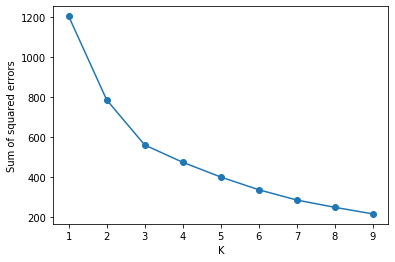

In [44]:
##########################
# The "elbow" method #
##########################
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(X)
    sse.append(km.inertia_)
plt.xlabel("K")
plt.ylabel("Sum of squared errors")
plt.plot(k_range, sse, marker='o')

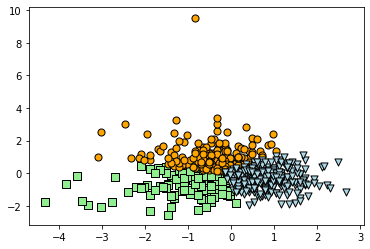

In [45]:
# model
km = KMeans(n_clusters = 3)
y_km=km.fit_predict(X)
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)
plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)